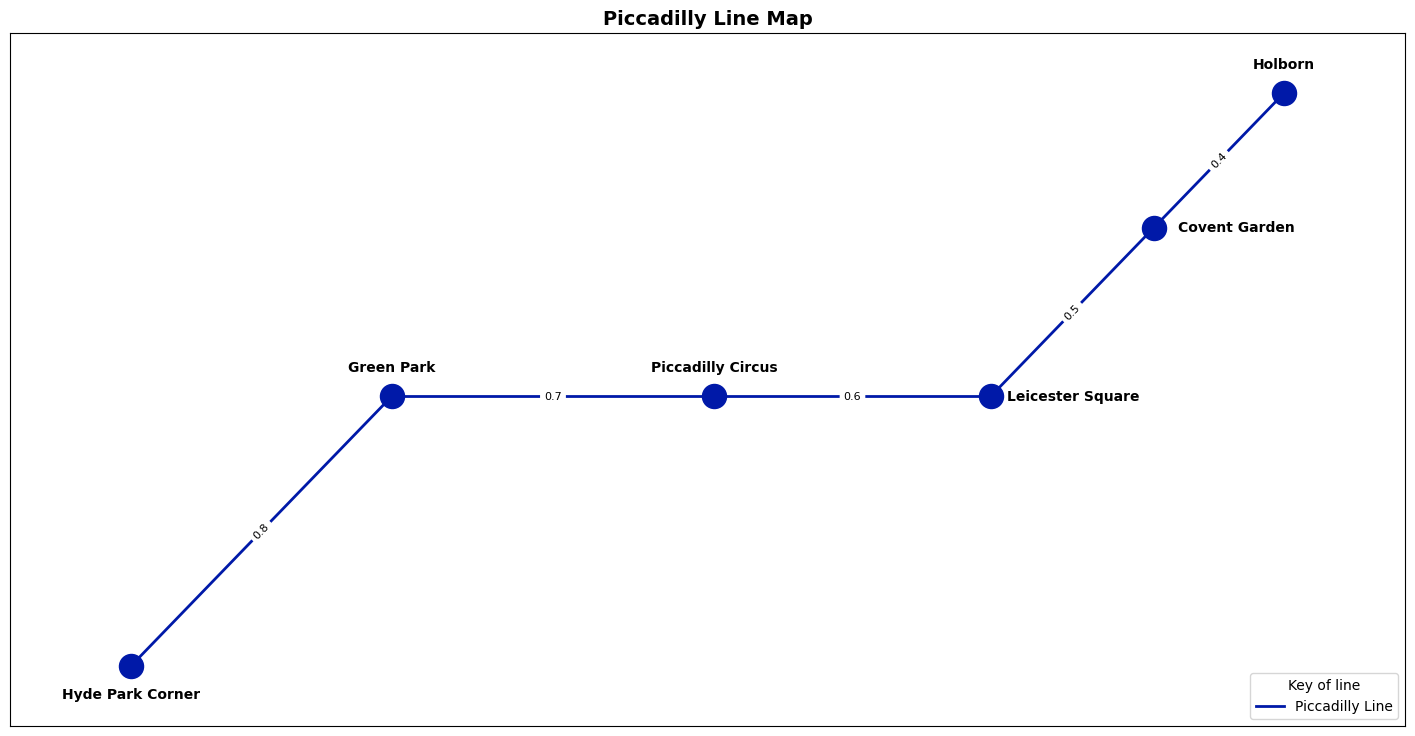

In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# ------------------- Station Data -------------------
# Distances between stations in kilometers
distances = {
    ("Hyde Park Corner", "Green Park"): 0.8,
    ("Green Park", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Leicester Square"): 0.6,
    ("Leicester Square", "Covent Garden"): 0.5,
    ("Covent Garden", "Holborn"): 0.4,
}

# Cumulative distances for proportional placement
cumulative_distances = [0]  # Start from 0 km
for edge in distances:
    cumulative_distances.append(cumulative_distances[-1] + distances[edge])

# Normalize distances to fit within a 1-unit range
max_distance = cumulative_distances[-1]
normalized_distances = [d / max_distance for d in cumulative_distances]

# Adjust x and y coordinates for proportional movement
stations = {}
current_x, current_y = 0.0, 0.0  # Start at origin
stations["Hyde Park Corner"] = (current_x, current_y)  # First station

# Define movement type for each segment
movements = [
    "diagonal_up",  # Hyde Park Corner -> Green Park
    "sideways",     # Green Park -> Piccadilly Circus
    "sideways",     # Piccadilly Circus -> Leicester Square
    "diagonal_up",  # Leicester Square -> Covent Garden
    "diagonal_up",  # Covent Garden -> Holborn
]

# Define step-wise station positions
for i, movement in enumerate(movements):
    distance_ratio = normalized_distances[i + 1] - normalized_distances[i]
    if movement == "sideways":
        # Move only in x-direction
        current_x += distance_ratio
    elif movement == "diagonal_up":
        # Move equally in x and y directions (45° diagonal)
        step = distance_ratio / math.sqrt(2)  # Scale by √2 for diagonal
        current_x += step
        current_y += step
    stations[list(distances.keys())[i][1]] = (current_x, current_y)

# ------------------- Graph Data Preparation -------------------
G = nx.Graph()

# Add nodes with positions
for station, pos in stations.items():
    G.add_node(station, pos=pos)

# Add edges with weights (distances)
color_mapping = "#0019A8"
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance, color=color_mapping)

# Custom label offsets (dx, dy) for each station
label_offsets = {
    "Hyde Park Corner": (0, -0.02),
    "Green Park": (0, 0.02),
    "Piccadilly Circus": (0, 0.02),
    "Leicester Square": (0.06, 0),
    "Covent Garden": (0.06, 0),
    "Holborn": (0, 0.02),
}

# Adjust label positions
adjusted_positions = {}
for station, pos in stations.items():
    offset = label_offsets.get(station, (0, 0))
    adjusted_positions[station] = (pos[0] + offset[0], pos[1] + offset[1])

# ------------------- Graph Visualization -------------------
plt.figure(figsize=(18, 9))  # Adjust figure size perfect raito (18.2, 8.8)

positions = nx.get_node_attributes(G, 'pos')
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
edge_colors = [d['color'] for _, _, d in G.edges(data=True)]

# Draw nodes
nx.draw_networkx_nodes(G, pos=positions, node_size=300, node_color=color_mapping)

# Draw edges
nx.draw_networkx_edges(G, pos=positions, edge_color=edge_colors, width=2)

# Draw station labels with adjusted positions
nx.draw_networkx_labels(G, pos=adjusted_positions, font_size=10, font_weight='bold')

# Draw edge labels (distances)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=8)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color=color_mapping, lw=2, label='Piccadilly Line')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=True, title="Key of line")

# Add title
plt.title("Piccadilly Line Map", fontsize=14, fontweight='bold')

# Show the plot
plt.show()
